In [80]:
from Bio import GenBank
from Bio import SeqIO
from Bio.SeqUtils import GC

from pathlib import Path
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [2]:
data=pd.read_csv('out/data02.csv')

In [4]:
data.index = data.accession
data = data.drop(columns=['accession','pol_loc', 'env_loc', 'gag_loc', 'vpr_loc', 'vif_loc', 'tat_loc', 'rev_loc', 'vpu_loc', 'nef_loc'])

In [9]:
data

,length,sequence,pol_pro,env_pro,gag_pro,vpr_pro,vif_pro,tat_pro,rev_pro,vpu_pro,...,country,pol,env,gag,vpr,vif,tat,rev,vpu,nef
accession,,,,,,,,,,,,,,,,,,,,,
MZ736147,851,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NVTENFNMWKNNMAEQMQEDVISLWDQSLKPCVKLTPLCVVLNCTN...,NaN,NaN,NaN,NaN,NaN,NaN,...,China,NaN,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MZ736148,849,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NVTENFNMWKNNMAEQMQEDVISLWDQSLKPCVKLTPLCVVLNCTN...,NaN,NaN,NaN,NaN,NaN,NaN,...,China,NaN,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MZ736149,851,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NVTENFNMWKNNMAEQMQEDVISLWDQSLKPCVKLTPLCVVLNCTN...,NaN,NaN,NaN,NaN,NaN,NaN,...,China,NaN,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MZ736150,851,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NVTENFNMWKNNMAEQMEEDVISLWDQSLKPCVKLTPLCVVLNCTN...,NaN,NaN,NaN,NaN,NaN,NaN,...,China,NaN,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MZ736151,849,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NVTENFNMWKNNMAEQMQEDVISLWDQSLKPCVKLTPLCVVLNCTN...,NaN,NaN,NaN,NaN,NaN,NaN,...,China,NaN,AATGTAACAGAAAATTTTAACATGTGGAAAAATAATATGGCAGAGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MW145174,376,GTCTGCTACACCCTATGTGCCAGCACGGAATGGAGGATGAACACAG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MW145175,393,ACTGTCTGCTACACCCTGTGTGCCAGCATGGAATGGGTGATCAGCA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MW145176,313,TTGTTACACCCTGTCTGCCAGCATGGAATGGATGATGATCACAGAG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
descr = {
    'index': 'Unikalus sekos įrašo identifikatorius.',
    'length': 'aminorūgščių sekos ilgis', 
    'sequence': 'pilna aminorūgščių seka', 
    'pol_pro': 'POL proteinas, viruso fermentų pirmtakas, baltymų seka', 
    'env_pro': 'ENG proteinas, apvalkalo baltymų SU ir TM pirmtakas, skaidomas ląstelių proteazės, baltymų seka', 
    'gag_pro': 'GAG proteinas, vidinių struktūrinių baltymų pirmtakas, baltymų seka', 
    'vpr_pro': 'VPR proteinas, viruso dalelių komponentas, sąveikauja su p6, palengvina viruso užkrečiamumą ir poveikį ląstelės ciklui, baltymų seka', 
    'vif_pro': 'VIF proteinas, būtinas infekcinių virusų gamybai in vivo, baltymų seka', 
    'tat_pro': 'TAT proteinas, viruso genų transkripcijos aktyvatorius, baltymų seka', 
    'rev_pro': 'REV proteinas, reguliuoja nesujungtos ir iš dalies susijungusios virusinės mRNR eksportą, baltymų seka', 
    'vpu_pro': 'VPU proteinas, veikia viruso dalelių išsiskyrimą, CD4 skilimo kontrolę, moduliuoja intracelulinius mainus, baltymų seka', 
    'nef_pro': 'NEF proteinas, miristiliuotas baltymas, įtakoja ŽIV replikaciją, viruso dalelių užkrečiamumo didinimą, CD4 reguliavimą tikslinėse ir HLA ląstelėse, baltymų seka',
    'country': 'viruso sekos kilmės šalis', 
    'pol': 'POL proteinas, viruso fermentų pirmtakas, aminorūgščių seka', 
    'env': 'ENG proteinas, apvalkalo baltymų SU ir TM pirmtakas, skaidomas ląstelių proteazės, aminorūgščių seka', 
    'gag': 'GAG proteinas, vidinių struktūrinių baltymų pirmtakas, aminorūgščių seka', 
    'vpr': 'VPR proteinas, viruso dalelių komponentas, sąveikauja su p6, palengvina viruso užkrečiamumą ir poveikį ląstelės ciklui, aminorūgščių seka', 
    'vif': 'VIF proteinas, būtinas infekcinių virusų gamybai in vivo, aminorūgščių seka', 
    'tat': 'TAT proteinas, viruso genų transkripcijos aktyvatorius, aminorūgščių seka', 
    'rev': 'REV proteinas, reguliuoja nesujungtos ir iš dalies susijungusios virusinės mRNR eksportą, aminorūgščių seka', 
    'vpu': 'VPU proteinas, veikia viruso dalelių išsiskyrimą, CD4 skilimo kontrolę, moduliuoja intracelulinius mainus, aminorūgščių seka', 
    'nef': 'NEF proteinas, miristiliuotas baltymas, įtakoja ŽIV replikaciją, viruso dalelių užkrečiamumo didinimą, CD4 reguliavimą tikslinėse ir HLA ląstelėse, aminorūgščių seka'
}

seqs = [
    'sequence', 'pol_pro', 'env_pro', 'gag_pro', 'vpr_pro',
    'vif_pro',  'tat_pro', 'rev_pro', 'vpu_pro', 'nef_pro',
    'pol',     'env',     'gag',     'vpr',      'vif',
    'tat',     'rev',     'vpu',     'nef'
]

In [95]:
n = len(data)

cols = ['index']
cols.extend(list(data.columns))
cols = { col: col.upper().replace("_","\\_") for col in cols }
cols['index']='ACCESSION'

for col, name in cols.items():
    
    if col == 'index':
        d = pd.Series(data.index)
    else:
        d = data[col]
    
    d = d[~pd.isnull(d)]
    u = d.unique()

    print(f'    \item {name}: {descr[col]},\\\\')
    print(f'    reikšmingų elementų skaičius {len(d)} ({len(d)/n*100.:0.2f}\\%),\\\\')
    print(f'    trūkstamų reikšmių dažnis {(n - len(d))/n*100.:0.2f}\\%,\\\\')
    print(f'    unikalių reikšmių {len(u)} ({len(u)/len(d)*100.:0.2f}\\%)\\\\')
    
    if d.dtype == object:

        hname = 'sekos reikšmių ilgio'
        h = d.str.len()
    
    else:
        
        hname = 'reikšmių'
        h = d
        
#     fig, ax1 = plt.subplots(figsize=(12,8))
#     h.hist(ax=ax1, bins=20)
#     ax1.set_xlabel('reikšmės')
#     ax1.set_ylabel('skaičius')
#     fig.savefig(f"out/{hist}.png", bbox_inches='tight')
#     plt.clf()
    
    if col in seqs:

        print(f'    \\ref{{fig:hist_{col}}} pav. pateiktos {hname} histogramos.')
        print(f'    \\begin{{figure}}')
        print(f'    \\centering')
        print(f'    \\subfigure{{')
        print(f'    \\includegraphics[clip=true, width=7cm]{{pics/hist_{col}.png}}\hspace{{1em}}')
        print(f'    \\includegraphics[clip=true, width=7cm]{{pics/cum_{col}.png}}')
        print(f'    }}')
        print(f'    \\caption{{{name} {hname} histogramos.}}')
        print(f'    \\label{{fig:hist_{col}}}')
        print(f'    \\end{{figure}}')
        
#         fig, ax1 = plt.subplots(figsize=(12,8))
#         ax1.plot(sorted(GC(s) for s in u))
#         ax1.set_xlabel('sekos')
#         ax1.set_ylabel('GC%')
#         fig.savefig(f"out/cum_{col}.png", bbox_inches='tight')
#         plt.clf()

    else:
        
        print(f'    \\ref{{fig:hist_{col}}} pav. pateikta {hname} histograma.')
        print(f'    \\begin{{figure}}[ht!]')
        print(f'        \\centering')
        print(f'        \\includegraphics[width=0.75\\textwidth]{{pics/{hist}.png}}')
        print(f'        \\caption{{{name} {hname} histograma.}}')
        print(f'        \\label{{fig:hist_{col}}}')
        print(f'    \\end{{figure}}')
    

    

    \item ACCESSION: Unikalus sekos įrašo identifikatorius.,\\
    reikšmingų elementų skaičius 983029 (100.00\%),\\
    trūkstamų reikšmių dažnis 0.00\%,\\
    unikalių reikšmių 983029 (100.00\%)\\
    \ref{fig:hist_index} pav. pateikta sekos reikšmių ilgio histograma.
    \begin{figure}[ht!]
        \centering
        \includegraphics[width=0.75\textwidth]{pics/hist_nef.png}
        \caption{ACCESSION sekos reikšmių ilgio histograma.}
        \label{fig:hist_index}
    \end{figure}
    \item LENGTH: aminorūgščių sekos ilgis,\\
    reikšmingų elementų skaičius 983029 (100.00\%),\\
    trūkstamų reikšmių dažnis 0.00\%,\\
    unikalių reikšmių 8001 (0.81\%)\\
    \ref{fig:hist_length} pav. pateikta reikšmių histograma.
    \begin{figure}[ht!]
        \centering
        \includegraphics[width=0.75\textwidth]{pics/hist_nef.png}
        \caption{LENGTH reikšmių histograma.}
        \label{fig:hist_length}
    \end{figure}
    \item SEQUENCE: pilna aminorūgščių seka,\\
    reikšmingų elemen

    \item ENV: ENG proteinas, apvalkalo baltymų SU ir TM pirmtakas, skaidomas ląstelių proteazės, aminorūgščių seka,\\
    reikšmingų elementų skaičius 330740 (33.64\%),\\
    trūkstamų reikšmių dažnis 66.36\%,\\
    unikalių reikšmių 267833 (80.98\%)\\
    \ref{fig:hist_env} pav. pateiktos sekos reikšmių ilgio histogramos.
    \begin{figure}
    \centering
    \subfigure{
    \includegraphics[clip=true, width=7cm]{pics/hist_env.png}\hspace{1em}
    \includegraphics[clip=true, width=7cm]{pics/cum_env.png}
    }
    \caption{ENV sekos reikšmių ilgio histogramos.}
    \label{fig:hist_env}
    \end{figure}
    \item GAG: GAG proteinas, vidinių struktūrinių baltymų pirmtakas, aminorūgščių seka,\\
    reikšmingų elementų skaičius 210507 (21.41\%),\\
    trūkstamų reikšmių dažnis 78.59\%,\\
    unikalių reikšmių 111451 (52.94\%)\\
    \ref{fig:hist_gag} pav. pateiktos sekos reikšmių ilgio histogramos.
    \begin{figure}
    \centering
    \subfigure{
    \includegraphics[clip=true, width=7cm

In [85]:
gc_values = sorted(GC(s) for s in data.sequence)

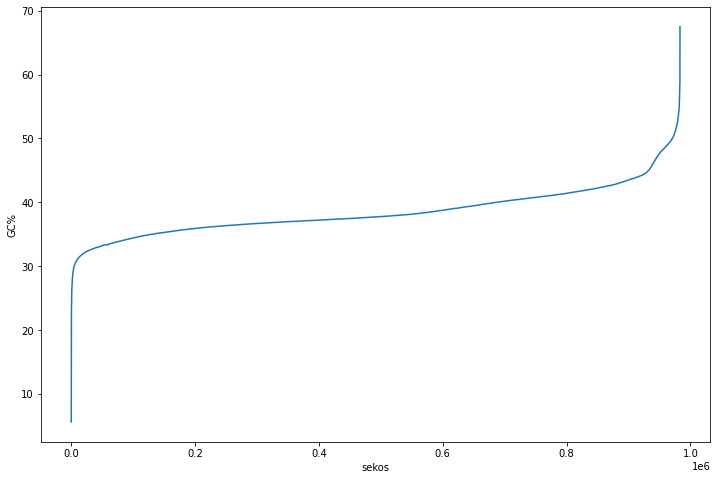

In [87]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(gc_values)
ax1.set_xlabel('sekos')
ax1.set_ylabel('GC%')
#fig.savefig(f"out/{hist}.png", bbox_inches='tight')
#plt.clf()
plt.show()

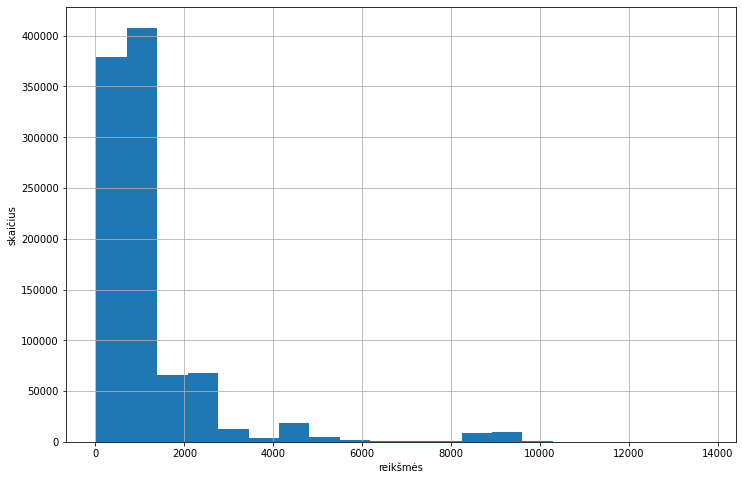

In [38]:


gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse("ls_orchid.fasta", "fasta"))
Having read in each sequence and calculated the GC%, we then sorted them into ascending order. Now we’ll take this list of floating point values and plot them with matplotlib:

import pylab

pylab.plot(gc_values)
pylab.title(
    "%i orchid sequences\nGC%% %0.1f to %0.1f"
    % (len(gc_values), min(gc_values), max(gc_values))
)
pylab.xlabel("Genes")
pylab.ylabel("GC%")
pylab.show()
